In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

Fetch symbols for input.

In [ ]:
# URL of the Wikipedia page
# Excel file provided do not run this code.
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Fetch all tables from the Wikipedia page
tables = pd.read_html(url)

# Print the number of tables found
print(f"Number of tables found: {len(tables)}")

# Check if tables are found
if tables:
    # Select the first table
    df = tables[0]
    
    # Print the first few rows of the table to understand its structure
    print(df.head())
    
    # Extract the 'Country' column as a list
    stocks_list = df['Symbol'].tolist()
    
    # Print the list of countries
    print(stocks_list)
else:
    print("No tables found.")

In [ ]:
# Initialize an empty DataFrame
# Excel file provided do not run the below code. 
stocks_data = pd.DataFrame()

for stock in stocks_list:
    
    print(stock)
    # Download data for the stock
    data = yf.download(stock, period='1y')[['Close']]
    # Rename the 'Close' column to the stock ticker
    data.rename(columns={'Close': stock}, inplace=True)
    # Reset index to make 'Date' a column
    data.reset_index(inplace=True)
    # Merge the data into the main DataFrame
    if stocks_data.empty:
        stocks_data = data
    else:
        stocks_data = pd.merge(stocks_data, data, on='Date', how='outer')

# Set 'Date' as the index again
stocks_data.set_index('Date', inplace=True)

# Display the resulting DataFrame
print(stocks_data.head())

In [4]:
# stocks_data.to_excel('sp500_stocks_data.xlsx')
stocks_data = pd.read_excel('sp500_stocks_data.xlsx')
stocks_data

FileNotFoundError: [Errno 2] No such file or directory: 'sp500_stocks_data.xlsx'

In [43]:
df_stocks_corr = pd.DataFrame(stocks_data.corr())

In [44]:
rows = df_stocks_corr.shape[0]
columns = df_stocks_corr.shape[1]
rows,columns

(503, 503)

In [59]:
new_df = []

for row in range(rows):
    for col in range(columns):
        if row!=col and df_stocks_corr.iloc[row, col] >=0.95:
            new_df.append([df_stocks_corr.index[row], df_stocks_corr.columns[col], df_stocks_corr.iloc[row, col]])
new_df

[['AOS', 'COF', 0.9505301757999539],
 ['AOS', 'LEN', 0.9596800277614699],
 ['AOS', 'PHM', 0.9557609603679501],
 ['A', 'WAT', 0.9585735029239917],
 ['ALL', 'AIG', 0.9546797405681623],
 ['ALL', 'CB', 0.9515865617925878],
 ['ALL', 'CTAS', 0.9555462803475924],
 ['ALL', 'GD', 0.9618717188757856],
 ['ALL', 'HLT', 0.9596634319641477],
 ['ALL', 'L', 0.9755661208505154],
 ['ALL', 'PGR', 0.9679323689655479],
 ['ALL', 'RSG', 0.953064679019687],
 ['ALL', 'WRB', 0.951878961804561],
 ['GOOGL', 'GOOG', 0.9998087412179727],
 ['GOOG', 'GOOGL', 0.9998087412179727],
 ['AMZN', 'AIG', 0.9567881364925109],
 ['AMZN', 'AMP', 0.9662936494835823],
 ['AMZN', 'AMAT', 0.9538595271441179],
 ['AMZN', 'AVY', 0.9593932421743692],
 ['AMZN', 'AXON', 0.9515852373270506],
 ['AMZN', 'BK', 0.9544260492585226],
 ['AMZN', 'BSX', 0.9523140527897455],
 ['AMZN', 'CMG', 0.9560658969775747],
 ['AMZN', 'CTAS', 0.9728698528143841],
 ['AMZN', 'ETN', 0.9727343210878487],
 ['AMZN', 'ECL', 0.9510979572451704],
 ['AMZN', 'GD', 0.95306521

In [67]:
new_df = []
seen_pairs = set()

for row in range(rows):
    for col in range(columns):
        if row != col and df_stocks_corr.iloc[row, col] >= 0.95:
            pair = tuple(sorted([df_stocks_corr.index[row], df_stocks_corr.columns[col]]))
            if pair not in seen_pairs:
                new_df.append([df_stocks_corr.index[row], df_stocks_corr.columns[col], df_stocks_corr.iloc[row, col]])
                seen_pairs.add(pair)

In [70]:
new_df = pd.DataFrame(new_df, columns=['Stock 1', 'Stock 2', 'Correlation'])
new_df

,Stock 1,Stock 2,Correlation
0,AOS,COF,0.950530
1,AOS,LEN,0.959680
2,AOS,PHM,0.955761
3,A,WAT,0.958574
4,ALL,AIG,0.954680
...,...,...,...
871,VST,WDC,0.953523
872,GWW,WM,0.968376
873,WAB,WFC,0.961363
874,WAB,WDC,0.956709


In [78]:
df_pair_one = stocks_data[['AOS','COF']]
df_pair_one['Spread']=df_pair_one['COF'] - df_pair_one['AOS']
df_pair_one

C:\Users\Taher\AppData\Local\Temp\ipykernel_18924\3223211485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pair_one['Spread']=df_pair_one['COF'] - df_pair_one['AOS']


,AOS,COF,Spread
Date,,,
2023-06-20,70.089996,109.120003,39.030006
2023-06-21,69.849998,108.279999,38.430000
2023-06-22,69.040001,106.910004,37.870003
2023-06-23,69.489998,106.599998,37.110001
2023-06-26,70.949997,106.220001,35.270004
...,...,...,...
2024-06-12,83.589996,137.100006,53.510010
2024-06-13,83.669998,135.089996,51.419998
2024-06-14,82.459999,133.699997,51.239998


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


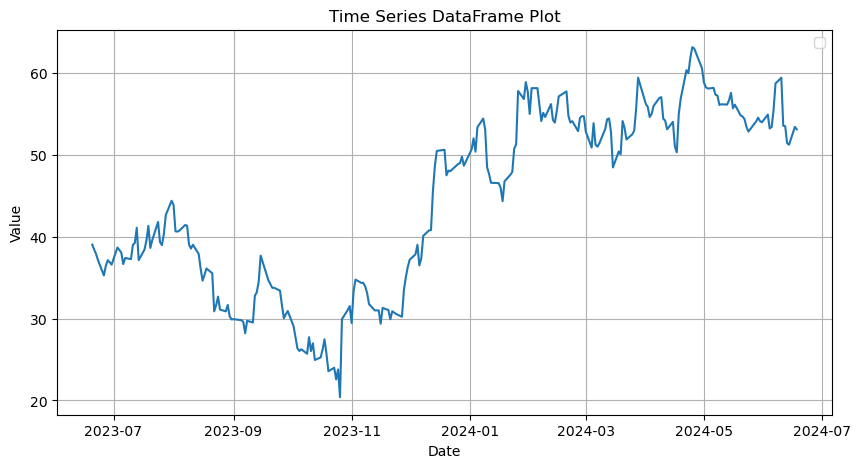

In [79]:

# Plotting the DataFrame
plt.figure(figsize=(10, 5))
plt.plot(df_pair_one.index,df_pair_one[['Spread']], linestyle='-')
plt.title('Time Series DataFrame Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

NEXT STEPS - calcualte % change for each stock and then difference in % change for each pair
then plot this difference in % change to see which pairs are stationary using AD fuller test
Then select those pairs and work on creating signals